2.1 Reading the dataset and preprocessing

In [95]:
import pandas as pd
import numpy as np
prime_df = pd.read_csv('iris.csv')
df=prime_df.copy()
d = {'Setosa':0, 'Versicolor':1, 'Virginica':2}
df['variety'] = df['variety'].map(d)
print(df.isnull().sum().sum())


0


In [96]:
df.duplicated().sum()

1

In [97]:
df = df.drop_duplicates()

In random forest if we didnt drop duplicate we will have higher accuracy


2.2 Data visualization

(-0.4, 2.3)

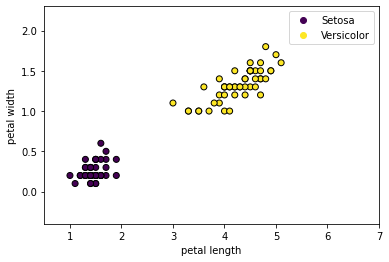

In [98]:
import matplotlib.pyplot as plt

df2 = df.copy()
df2 = df[df['variety'] != 2]

label = ("Setosa", "Versicolor")

x = df2.iloc[:, 2:4].values
y = df2.iloc[:,4].values

scatter=plt.scatter(x[:, 0], x[:, 1], c= y ,cmap='viridis',edgecolor='k')

plt.legend(handles=scatter.legend_elements()[0], labels=label)

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.xlim(x[:, 0].min() - 0.5,7)
plt.ylim(x[:, 1].min() - 0.5,x[:, 1].max() + 0.5)


2.3 Train a binary SVC

In [99]:
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1E10)
model.fit(x, y)


SVC(C=10000000000.0, kernel='linear')

In [100]:
def plot_svc_decision_function(model):
  
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
   
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
   
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


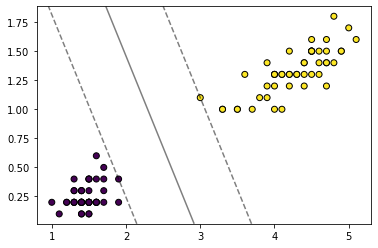

In [101]:
scatter=plt.scatter(x[:, 0], x[:, 1], c= y ,cmap='viridis',edgecolor='k')
plot_svc_decision_function(model)


2.4 Checking sensitivity to scaling

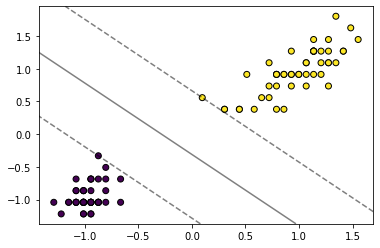

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df= scaler.fit_transform(df2)

x = scaled_df[:, 2:4]
y = scaled_df[:,4]


model.fit(x, y)
scatter=plt.scatter(x[:, 0], x[:, 1], c= y ,cmap='viridis',edgecolor='k')
plot_svc_decision_function(model)




2.5 Visualizing the whole data

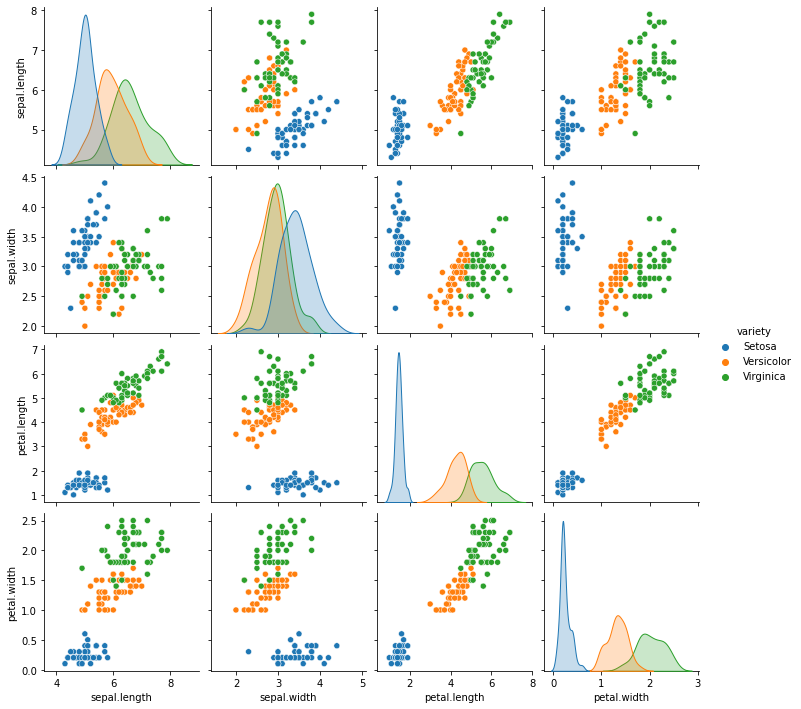

In [103]:
import seaborn as sns

sns.pairplot(prime_df,hue='variety')

2.6 Train/Test split

In [104]:
from sklearn.model_selection import train_test_split
x = df.iloc[:, :4].values
y = df.iloc[:,4].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True, random_state=123, stratify=y)



2.7 Train your SVC

In [105]:
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
model.get_params(deep=True)

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

2.8 Model evaluation: 
Precision is the ratio of correctly predicted positive observations to the total predicted positive observations---
Recall is the ratio of correctly predicted positive observations to the all observations in actual class---
F1 Score is the weighted average of Precision and Recall

In [106]:
y_predict = model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
class_names={"Setosa", "Versicolor","Virginica"}
print(classification_report(y_test, y_predict,target_names=class_names))

print(confusion_matrix(y_test, y_predict))


              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.89      0.80      0.84        10
   Virginica       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

[[10  0  0]
 [ 0  8  2]
 [ 0  1  9]]


In [107]:
from sklearn.model_selection import GridSearchCV
param_dict = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_dict,refit=True,verbose=0)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}


In [108]:
model = SVC(C= 10, gamma= 0.1, kernel= 'rbf')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred,target_names=class_names))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      0.90      0.95        10
   Virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


decision tree

In [109]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)
tree_predict = clf.predict(x_test)
clf.score(x_train, y_train)

1.0

plot decision tree

[Text(213.05454545454546, 605.7257142857143, 'X[3] <= 0.8\ngini = 0.667\nsamples = 119\nvalue = [40, 40, 39]'),
 Text(152.1818181818182, 512.537142857143, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(273.92727272727274, 512.537142857143, 'X[2] <= 4.75\ngini = 0.5\nsamples = 79\nvalue = [0, 40, 39]'),
 Text(121.74545454545455, 419.34857142857146, 'X[3] <= 1.65\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(60.872727272727275, 326.16, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(182.61818181818182, 326.16, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(426.1090909090909, 419.34857142857146, 'X[2] <= 4.95\ngini = 0.136\nsamples = 41\nvalue = [0, 3, 38]'),
 Text(304.3636363636364, 326.16, 'X[1] <= 2.95\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(243.4909090909091, 232.9714285714286, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(365.23636363636365, 232.9714285714286, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(547.8545454545455, 

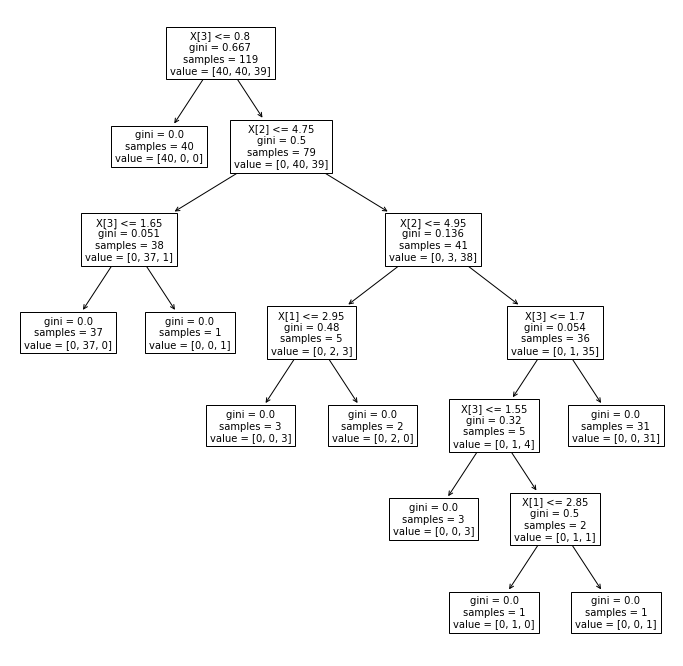

In [110]:
plt.figure(figsize=(12, 12))
tree.plot_tree(clf, fontsize=10)

[Text(251.10000000000002, 570.7800000000001, 'X[3] <= 0.8\ngini = 0.667\nsamples = 119\nvalue = [40, 40, 39]'),
 Text(167.4, 407.70000000000005, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(334.8, 407.70000000000005, 'X[2] <= 4.75\ngini = 0.5\nsamples = 79\nvalue = [0, 40, 39]'),
 Text(167.4, 244.62, 'X[3] <= 1.65\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(83.7, 81.53999999999996, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(251.10000000000002, 81.53999999999996, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(502.20000000000005, 244.62, 'X[2] <= 4.95\ngini = 0.136\nsamples = 41\nvalue = [0, 3, 38]'),
 Text(418.5, 81.53999999999996, 'gini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(585.9, 81.53999999999996, 'gini = 0.054\nsamples = 36\nvalue = [0, 1, 35]')]

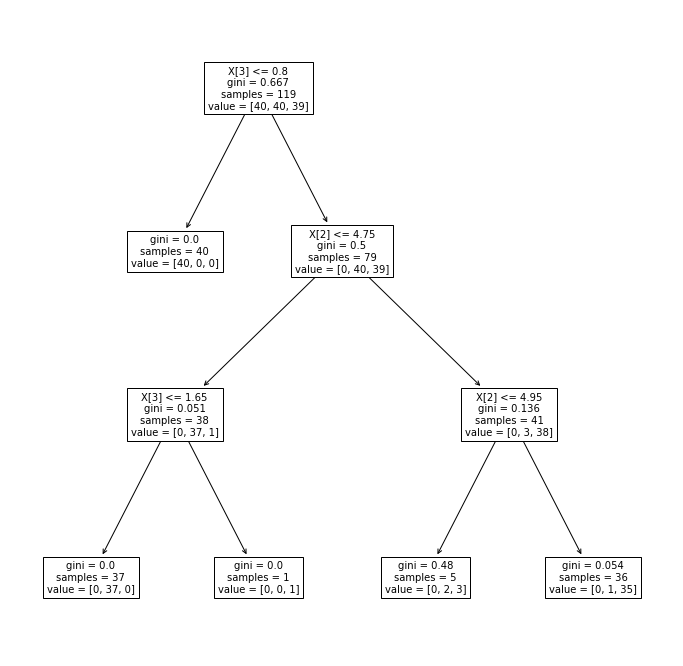

In [111]:
clf = tree.DecisionTreeClassifier(max_depth = 3, random_state=0)
clf.fit(x_train, y_train)
plt.figure(figsize=(12, 12))
y_pred = clf.predict(x_test)
tree.plot_tree(clf, fontsize=10)


 Tune hyper-parameters

In [112]:
from sklearn.tree import DecisionTreeClassifier
tree_param_dict = {'max_depth': [2, 3, 5, 10, 20], 'min_samples_leaf': [5, 10, 20, 50, 100],'criterion': ["gini", "entropy"]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_param_dict ,refit=True,verbose=0)
grid_tree.fit(x_train,y_train)
print(grid_tree.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}


In [113]:
best_model =  grid_tree.best_estimator_
best_model.fit(x_train, y_train)
Y_pred = best_model.predict(x_test)
print(classification_report(y_test, Y_pred, target_names=class_names))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      0.70      0.82        10
   Virginica       0.77      1.00      0.87        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



training random forest

In [114]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [115]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      0.80      0.89        10
   Virginica       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



comparing accuracy of random forest and decision tree in this data we can know that using random forest is much better than using decision tree.